# Digits dataset

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
import time
import pandas as pd
import numpy as np

import Mondrian

In [3]:
from sklearn import datasets
dat = datasets.load_digits(n_class=10,as_frame=True)#, return_X_y=False, as_frame=False)[source]¶

<Figure size 432x288 with 0 Axes>

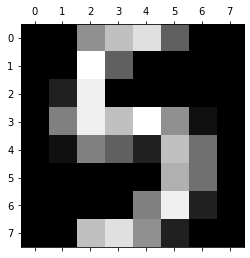

In [4]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dat.images[1769])
plt.show()

In [5]:
dat_df = dat.data.copy()
dat_df['target'] = dat.target
dat_df = dat_df.sort_values(by='target')
dat_df.index = np.arange(len(dat_df))

In [11]:
dat_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,12.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,13.0,16.0,7.0,0.0,0.0,0
2,0.0,0.0,2.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0,0
3,0.0,0.0,8.0,12.0,12.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,13.0,11.0,4.0,0.0,0.0,0
4,0.0,0.0,0.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,15.0,3.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,1.0,8.0,13.0,15.0,5.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,6.0,13.0,16.0,15.0,6.0,0.0,9
1793,0.0,0.0,9.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,14.0,14.0,7.0,0.0,0.0,9
1794,0.0,0.0,1.0,12.0,16.0,14.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,16.0,11.0,1.0,0.0,9
1795,0.0,0.0,6.0,12.0,14.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,7.0,13.0,12.0,4.0,0.0,0.0,9


In [7]:
number_of_samples_per_class = 10
random_state = 10

data = pd.DataFrame()
for i in range(10):
    data_i = dat_df[dat_df.target == i].sample(n=number_of_samples_per_class,random_state=random_state)
    data = pd.concat([data,data_i])
data.index = np.arange(len(data))

In [8]:
X = np.array(data[data.columns[0:-1]])
y = np.array(data[data.columns[-1]])

In [12]:
len(X)

100

In [12]:
import Matrix

start = time.perf_counter()
cut_ensemble = Matrix.cut_ensemble(X)
end = time.perf_counter()
print(end - start)

5.2026658999999995


In [10]:
import Matrix

start = time.perf_counter()
cut_ensemble = Matrix.cut_ensemble(X)
end = time.perf_counter()
print(end - start)

12.823112799999997


In [14]:
t0 = 0
lifetime = 10
exp = 15
metric = 'min_corr'

In [16]:
# prima di modifica codice
start = time.perf_counter()

data,part,m,list_p,classified_data = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

end = time.perf_counter()
print(end - start)

PARTITIONING:
total number of splits: 62
MERGING:
range of possible number of clusters: 1-40
1699.046554


In [15]:
# dopo modifica codice
start = time.perf_counter()

data,part,m,list_p,classified_data = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

end = time.perf_counter()
print(end - start)

PARTITIONING:
total number of splits: 61
MERGING:
range of possible number of clusters: 1-41
135.81593549999997


In [43]:
namefile_number = 0
namefile = 'example/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'_lifetime'+str(lifetime)+'_exp'+str(exp)+'_'+metric+'_'+str(namefile_number)
namefile

'example/digits_n10_seed10/digits_n10_seed10_lifetime10_exp15_min_corr_0'

In [44]:
Mondrian.save_tree(namefile,data,part,m,list_p,classified_data)

In [45]:
from sklearn.metrics.cluster import fowlkes_mallows_score

number_of_clusters = 10
fms = fowlkes_mallows_score(classified_data[number_of_clusters-1],y)
fms

0.38968585613772194

In [47]:
part[part.columns[:-1]]

,time,father,part_number,leaf
0,0.000000,nan,0,False
1,0.000810,0,1,False
2,0.000810,0,2,False
3,0.012458,1,3,False
4,0.012458,1,4,False
...,...,...,...,...
120,1.000146,115,120,True
121,1.107294,119,121,False
122,1.107294,119,122,True
123,1.214166,121,123,True


In [62]:
#labels = np.unique(classified_data[-1])
#for i in range(len(labels)):
#    print(classified_data[-1].count(labels[i]))

In [55]:
list_p[-1]

,part_number,neighbors,merged_part
0,15.0,"[17.0, 19.0, 22.0, 30.0, 32.0, 37.0, 42.0, 46....",[]
1,17.0,"[15.0, 19.0, 22.0, 30.0, 32.0, 37.0, 42.0, 46....",[40.0]
2,19.0,"[15.0, 17.0, 22.0, 30.0, 32.0, 37.0, 42.0, 46....",[]
3,22.0,"[15.0, 17.0, 19.0, 30.0, 32.0, 37.0, 42.0, 46....",[12.0]
4,30.0,"[15.0, 17.0, 19.0, 22.0, 32.0, 37.0, 42.0, 46....",[29.0]
5,32.0,"[15.0, 17.0, 19.0, 22.0, 30.0, 37.0, 42.0, 46....",[]
6,37.0,"[15.0, 17.0, 19.0, 22.0, 30.0, 32.0, 42.0, 46....",[18.0]
7,42.0,"[15.0, 17.0, 19.0, 22.0, 30.0, 32.0, 37.0, 46....",[50.0]
8,46.0,"[15.0, 17.0, 19.0, 22.0, 30.0, 32.0, 37.0, 42....",[]
9,47.0,"[15.0, 17.0, 19.0, 22.0, 30.0, 32.0, 37.0, 42....",[38.0]


In [67]:
part.query('time>0.7')['time'].unique()

array([0.86794, 0.71966, 0.78423, 0.72575, 0.79435, 1.30397, 0.73399,
       0.79934, 0.76736, 0.84458, 1.31853, 0.77301, 1.94684, 0.89084,
       1.7452 , 1.00015, 1.10729, 1.21417])

# change lifetime

In [69]:
lifetime = 0.7

In [70]:
start = time.perf_counter()

data,part,m,list_p,classified_data = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

end = time.perf_counter()
print(end - start)

namefile_number = 0
namefile = 'example/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'_lifetime'+str(lifetime)+'_exp'+str(exp)+'_'+metric+'_'+str(namefile_number)
namefile

PARTITIONING:
total number of splits: 50
MERGING:
range of possible number of clusters: 1-34
1756.4793017000002


'example/digits_n10_seed10/digits_n10_seed10_lifetime0.7_exp15_min_corr_0'

In [72]:
Mondrian.save_tree(namefile,data,part,m,list_p,classified_data)

In [71]:
number_of_clusters = 10
fms = fowlkes_mallows_score(classified_data[number_of_clusters-1],y)
fms

0.473803963763951

In [73]:
lifetime = 0.5

In [74]:
start = time.perf_counter()

data,part,m,list_p,classified_data = Mondrian.mondrian_tree(X,t0,lifetime,exp,metric)

end = time.perf_counter()
print(end - start)

PARTITIONING:
total number of splits: 37
MERGING:
range of possible number of clusters: 1-29
1781.7315689000006


In [75]:
namefile_number = 0
namefile = 'example/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'/digits_n'+str(number_of_samples_per_class)+'_seed'+str(random_state)+'_lifetime'+str(lifetime)+'_exp'+str(exp)+'_'+metric+'_'+str(namefile_number)
namefile

'example/digits_n10_seed10/digits_n10_seed10_lifetime0.5_exp15_min_corr_0'

In [76]:
Mondrian.save_tree(namefile,data,part,m,list_p,classified_data)

In [77]:
number_of_clusters = 10
fms = fowlkes_mallows_score(classified_data[number_of_clusters-1],y)
fms

0.38102895259924713